Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.optimize import golden, minimize

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.


Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan(str_1, str_2):
  eq_1 = list(map(float, str_1.split()))
  eq_2 = list(map(float, str_2.split()))
  res = np.linalg.solve(
      np.array([eq_1[:2], eq_2[:2]]),
      np.array([eq_1[-1], eq_2[-1]])
  )
  return f'{res[0]} {res[1]}'

In [ ]:
print(linan('2 5 1', '1 -10 3'))

1.0 -0.2


### Подсказка 1

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n):
  a = np.ones((n, n))
  a[1:n-1, 1:n-1] = 0
  return a

In [ ]:
decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример.
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
a, b = 3, 4

def f(x):
  return((x + a) ** 2 - b)

def g(x):
  return np.abs(f(x))

def fmin(func):
  return golden(func, brack=(-10, -4), full_output=True)


min_f = fmin(f)[0]
min_g = np.array([fmin(g)[0], minimize(g, [-10], method='trust-constr').x[0]])
print(np.round(min_f, 3))
print(np.round(min_g, 3))

-3.0
[-5. -1.]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

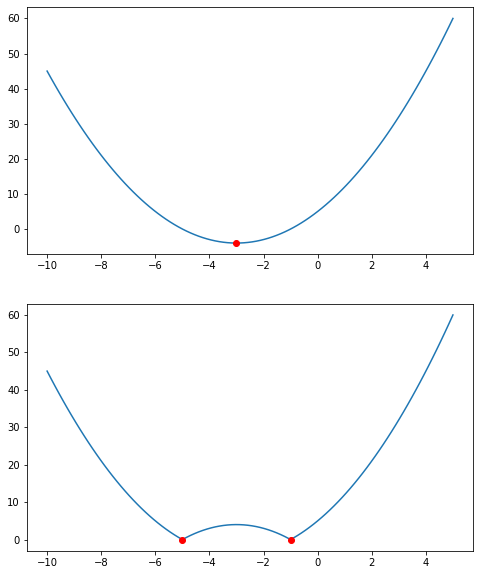

In [ ]:
plt.rcParams["figure.figsize"] = (8,10)

x = np.linspace(-10, 5, num=100)
y_f = f(x)
y_g = g(x)

figure, axis = plt.subplots(2, 1)
axis[0].plot(x, y_f, min_f, f(min_f), 'ro')
axis[1].plot(x, y_g, min_g, g(min_g), 'ro')

plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.




In [ ]:
def C(n, m):
  return np.math.factorial(n) / np.math.factorial(n-m) / np.math.factorial(m)

def bernulli(p, m, n):
  return C(n, m) * p**m * (1-p)**(n-m)

1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
p_1 = 2 * (1/2) ** 10 # вероятность выпадения 10 раз одинаковой стороны у 1 человека
res_p_1 = 1 - bernulli(p_1, 0, 1000)
print(f'1. ОТВЕТ: {res_p_1:10f}')

1. ОТВЕТ:   0.858440


 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
p_only_8 = 2 * (2 * (2 * (1/2) **10)) # вероятность выпадения ровно 8 раз подряд той же стороной у 1 человека
p_only_9 = 2 * (2 * (1/2) ** 10) # вероятность выпадения ровно 9 раз подряд той же стороной у 1 человека

p_2 = p_only_8 + p_only_9 + p_1 # вероятность выпадения 8 раз подряд той же самой стороной у 1 человека
res_p_2 = 1 - bernulli(p_2, 0, 1000)
print(f'2. ОТВЕТ: {res_p_2:10f}')

2. ОТВЕТ:   0.999999



 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
p_3 = 2 * (1/2) ** 10 # вероятность выпадения 10 раз одинаковой стороны у 1 человека
res_p_3 = bernulli(p_3, 3, 1000)
print(f'3. ОТВЕТ: {res_p_3:10f}')

3. ОТВЕТ:   0.176287
